# importing the libraries

In [18]:
# Import libraries
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# loading the dataset

In [19]:
dataset = pd.read_csv("diabetes.csv")
dataset

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


# Displaying the first five rows

In [20]:
df = dataset.head(5)
df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


# Reshape

In [21]:
df_1 = dataset.shape
df_1

(768, 9)

# Describe the dataset

In [22]:
df_2 = dataset.describe()
df_2

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


# Data Preprocessing

In [23]:
# Step 3: Data Preprocessing
# Checking for missing values
print(dataset.isnull().sum())  # If there are missing values, handle them accordingly

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64


# feature Scaling

In [24]:
# Feature scaling (standardization)
scaler = StandardScaler()
X = dataset.drop(columns='Outcome')  # Features
y = dataset['Outcome']  # Target
print(X)
print(y)
X_scaled = scaler.fit_transform(X)

     Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0              6      148             72             35        0  33.6   
1              1       85             66             29        0  26.6   
2              8      183             64              0        0  23.3   
3              1       89             66             23       94  28.1   
4              0      137             40             35      168  43.1   
..           ...      ...            ...            ...      ...   ...   
763           10      101             76             48      180  32.9   
764            2      122             70             27        0  36.8   
765            5      121             72             23      112  26.2   
766            1      126             60              0        0  30.1   
767            1       93             70             31        0  30.4   

     DiabetesPedigreeFunction  Age  
0                       0.627   50  
1                       0.351   31  


# split the dataset

In [25]:
# Step 4: Split the dataset
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Train the model and predictions

In [26]:
# Step 5: Choose a model - Logistic Regression
model = LogisticRegression()

# Step 6: Train the model
model.fit(X_train, y_train)

# Step 7: Make predictions
y_pred = model.predict(X_test)

# Evaluating the model

In [27]:
# Step 8: Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy * 100:.2f}%")

# Print confusion matrix and classification report
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

Accuracy: 75.32%
[[79 20]
 [18 37]]
              precision    recall  f1-score   support

           0       0.81      0.80      0.81        99
           1       0.65      0.67      0.66        55

    accuracy                           0.75       154
   macro avg       0.73      0.74      0.73       154
weighted avg       0.76      0.75      0.75       154



# Making the prediction by using the user input

In [28]:
input_data = (5, 166, 72, 19, 175, 25.8, 0.587, 51)

# Convert input data to numpy array
input_data_as_numpy_array = np.asarray(input_data)

# Reshape the array (1 sample, 8 features)
input_data_reshaped = input_data_as_numpy_array.reshape(1, -1)

# Standardize the input data
std_data = scaler.transform(input_data_reshaped)

#  Make prediction
prediction = model.predict(std_data)

# Output result
if prediction[0] == 0:
    print('The person is not diabetic.')
else:
    print('The person is diabetic.')

The person is diabetic.


c:\Users\mypc\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


# scatter plot

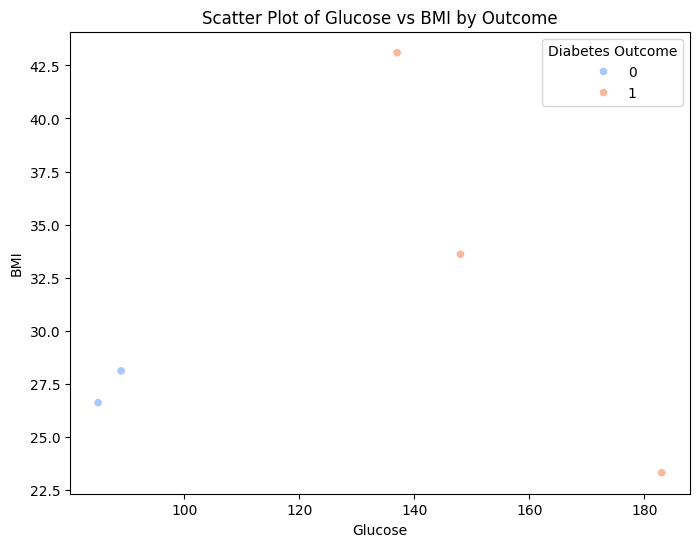

In [29]:
import matplotlib.pyplot as plt
import seaborn as sns

# Let's plot Glucose vs. BMI and color by 'Outcome'

# Create a scatter plot
plt.figure(figsize=(8,6))
sns.scatterplot(x='Glucose', y='BMI', hue='Outcome', data=df, palette='coolwarm')

# Customize the plot
plt.title('Scatter Plot of Glucose vs BMI by Outcome')
plt.xlabel('Glucose')
plt.ylabel('BMI')
plt.legend(title='Diabetes Outcome', loc='upper right')
plt.show()


# histograms

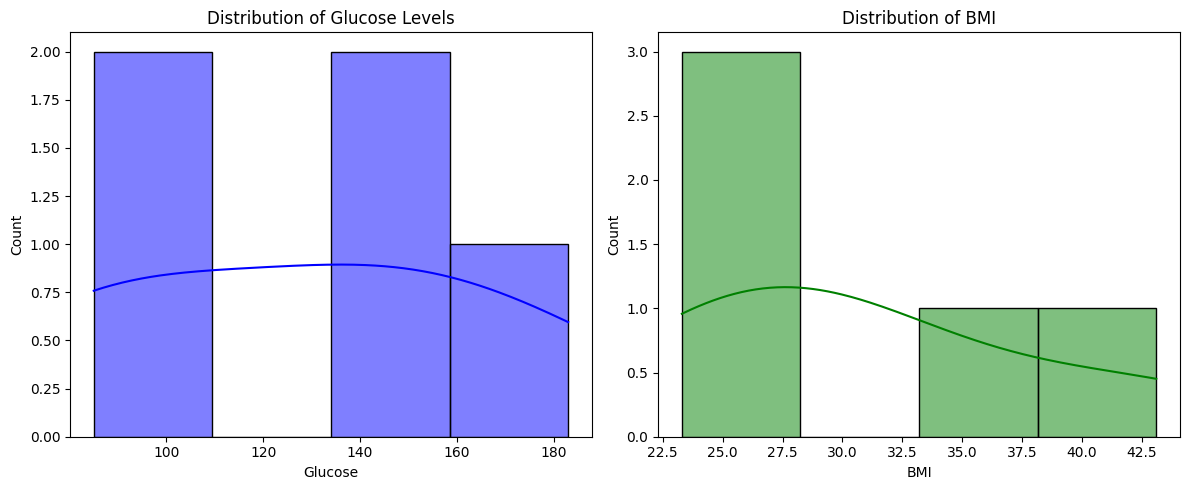

In [30]:
import matplotlib.pyplot as plt
import seaborn as sns

# Plot the histograms of Glucose and BMI
plt.figure(figsize=(12,5))

# Subplot 1: Glucose
plt.subplot(1, 2, 1)
sns.histplot(df['Glucose'], kde=True, color='blue')
plt.title('Distribution of Glucose Levels')
plt.xlabel('Glucose')

# Subplot 2: BMI
plt.subplot(1, 2, 2)
sns.histplot(df['BMI'], kde=True, color='green')
plt.title('Distribution of BMI')
plt.xlabel('BMI')

# Show the plots
plt.tight_layout()
plt.show()